# Malicious URL Detector (Training Phase + Testing Phase)

## Importing necessary modules

In [ ]:
cd /content/drive/MyDrive/MaliciousUrlDetec

/content/drive/MyDrive/MaliciousUrlDetec


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import pickle
import joblib 

In [ ]:
import numpy as np
import pandas as pd

df=pd.read_csv("dataset.csv",encoding="latin1")
df

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,1,1,-1,-1,0,0,-1,1,1,0,1,1,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,1,1,1,1,0,0,-1,1,1,0,-1,1,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,11051,1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,0,-1,-1,-1,-1,1,1,-1,-1,1,1,1,1
11051,11052,-1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,-1,0,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,1,-1
11052,11053,1,-1,1,1,1,-1,1,-1,-1,1,1,1,1,0,-1,-1,1,1,0,1,1,1,1,1,1,1,-1,1,0,1,-1
11053,11054,-1,-1,1,1,1,-1,-1,-1,1,-1,1,1,-1,-1,1,-1,1,1,0,-1,1,-1,1,1,1,1,-1,1,1,1,-1


In [ ]:
feature_names_df = ['having_IPhaving_IP_Address','URLURL_Length','having_At_Symbol','double_slash_redirecting','Prefix_Suffix','having_Sub_Domain','Domain_registeration_length','HTTPS_token','SFH','Submitting_to_email','Abnormal_URL','Redirect','age_of_domain','DNSRecord','web_traffic']
x_df = df[feature_names_df]
y_df = df['Result']

## Plotting Feature Importance

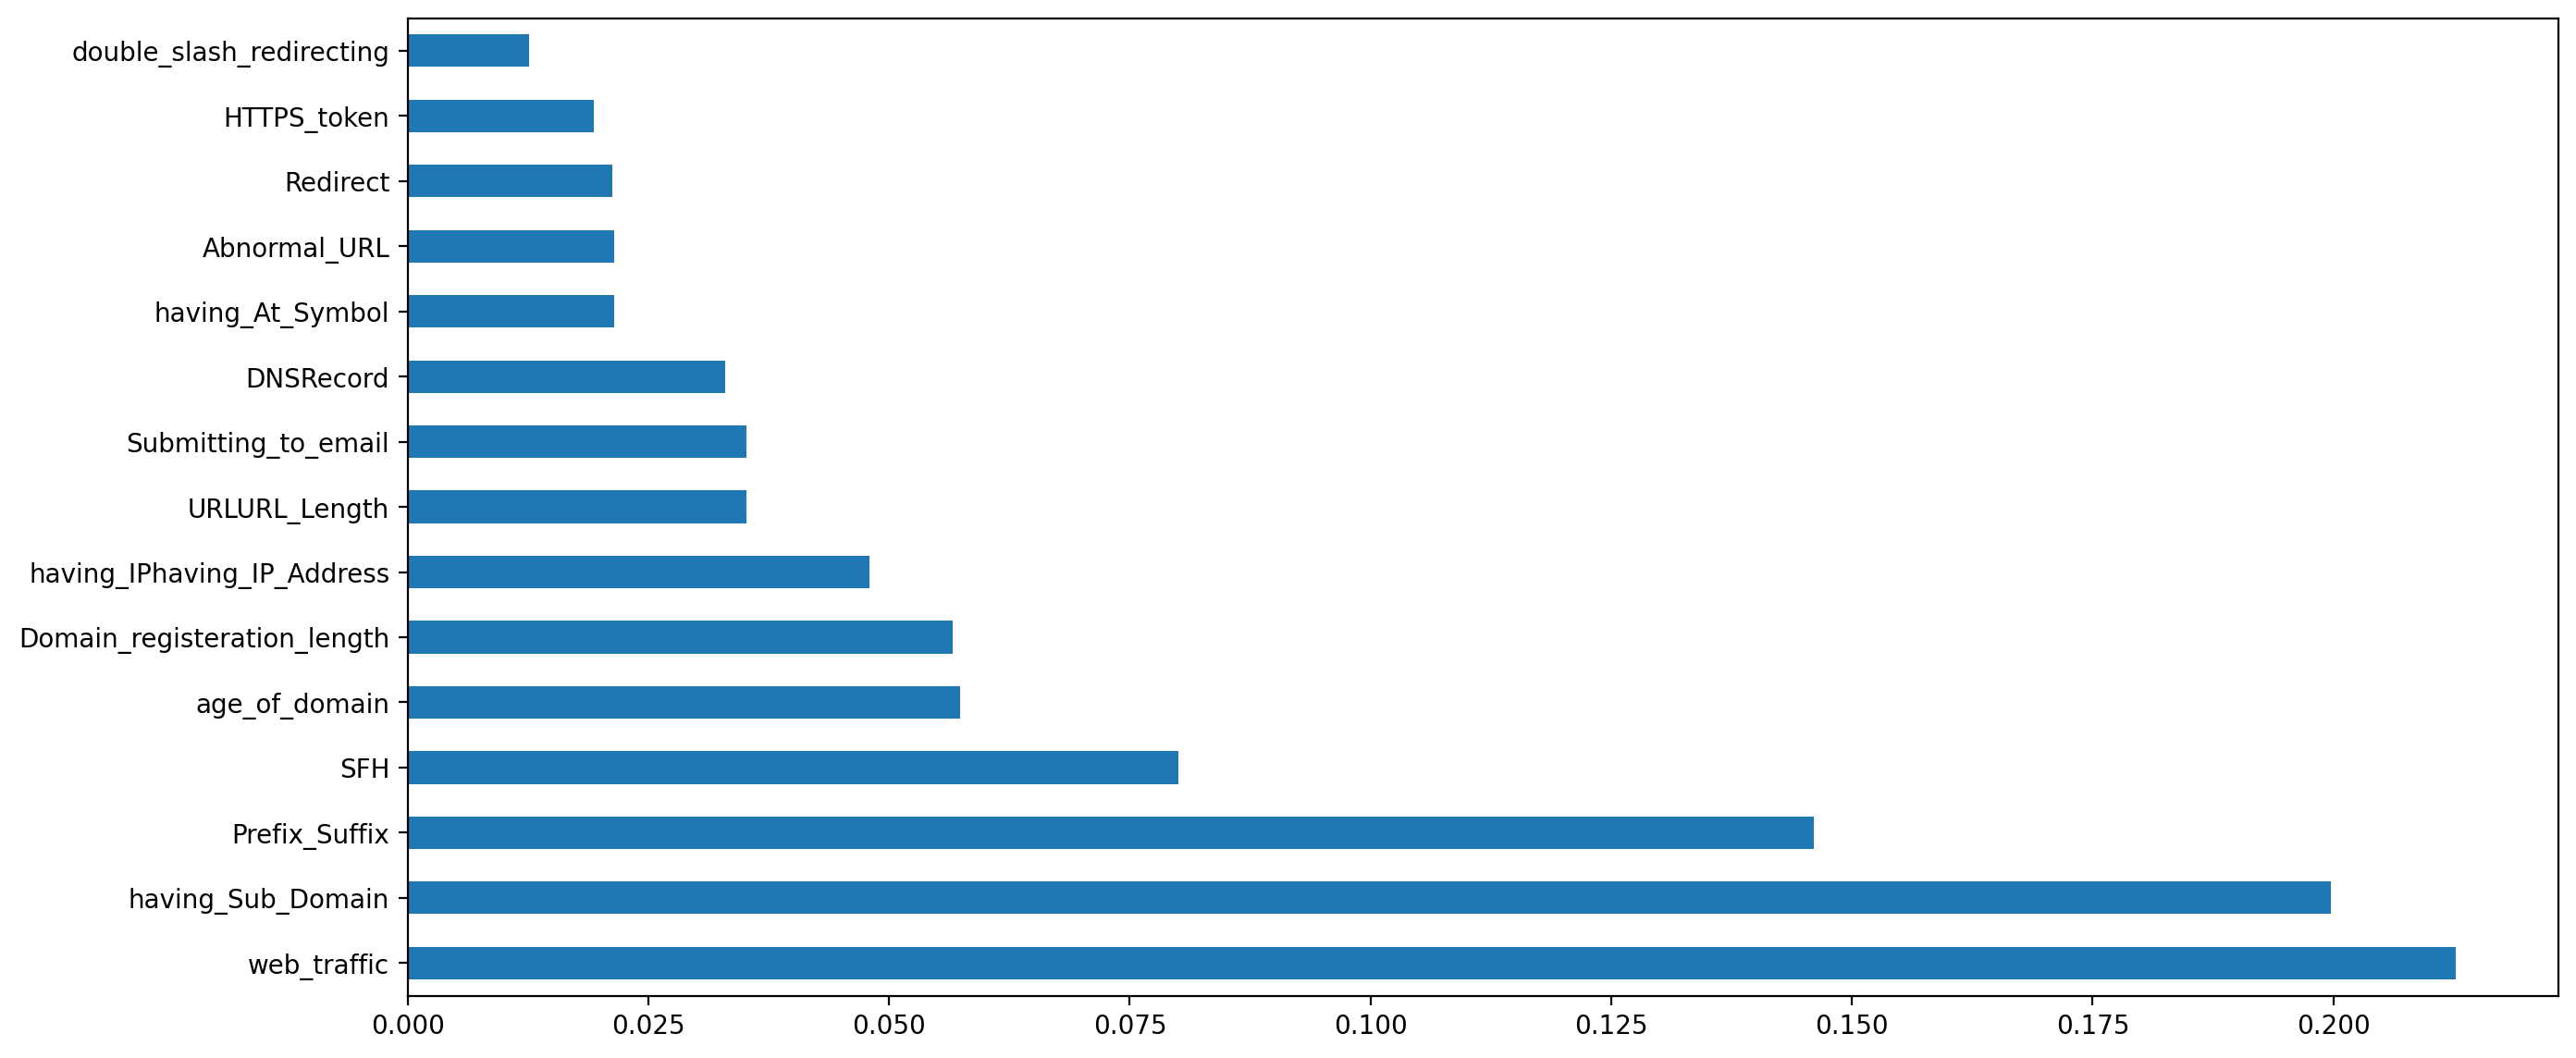

In [ ]:
import pandas as pd
import numpy as np
X = x_df    #independent columns
y = y_df    #target column 
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
fig, ax = plt.subplots(figsize=(15,7),dpi=200)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
x_df

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,HTTPS_token,SFH,Submitting_to_email,Abnormal_URL,Redirect,age_of_domain,DNSRecord,web_traffic
0,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,-1,-1
1,1,1,1,1,-1,0,-1,-1,-1,1,1,0,-1,-1,0
2,1,0,1,1,-1,-1,-1,-1,-1,-1,-1,0,1,-1,1
3,1,0,1,1,-1,-1,1,-1,-1,1,1,0,-1,-1,1
4,1,0,1,1,-1,1,-1,1,-1,1,1,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,-1,1,1,1,-1,1,-1,-1,1,0,1,1,-1
11051,-1,1,-1,-1,-1,1,-1,1,0,-1,-1,1,1,1,1
11052,1,-1,1,1,-1,1,-1,1,-1,1,1,0,1,1,1
11053,-1,-1,1,1,-1,-1,1,1,-1,1,1,0,1,1,1


## Applying train test split on data

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.1,random_state=42)

In [ ]:
X_train

,having_IPhaving_IP_Address,URLURL_Length,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,Domain_registeration_length,HTTPS_token,SFH,Submitting_to_email,Abnormal_URL,Redirect,age_of_domain,DNSRecord,web_traffic
1562,1,1,1,1,-1,-1,-1,1,1,1,1,0,1,-1,-1
10405,-1,-1,1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,1
5425,1,-1,1,1,-1,0,-1,1,-1,1,1,0,-1,1,0
11018,-1,-1,1,1,-1,0,1,1,-1,1,1,0,1,1,1
3297,1,-1,1,1,-1,-1,1,1,-1,1,1,0,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,-1,0,1,1,-1,0,1,-1,-1,1,1,0,-1,1,1
5191,1,1,-1,1,-1,1,1,1,-1,1,1,0,-1,1,-1
5390,-1,1,-1,1,-1,0,1,1,-1,1,1,0,1,1,0
860,1,-1,1,1,-1,1,1,1,-1,-1,1,0,1,1,-1


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', multi_class='auto',max_iter=100)
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = preprocessing.LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

# Predict the transformed test documents
predictions = model.predict((X_test))
print("eh",predictions)
print('AUC: ', multiclass_roc_auc_score(y_test, predictions))

eh [-1 -1 -1 ... -1 -1  1]
AUC:  0.7878203742203743


**MIne bold text ! **

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



### Model Built ###

              precision    recall  f1-score   support

         bad       0.96      0.83      0.89     15136
        good       0.96      0.99      0.98     68957

    accuracy                           0.96     84093
   macro avg       0.96      0.91      0.93     84093
weighted avg       0.96      0.96      0.96     84093



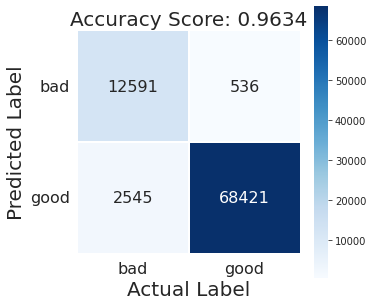

In [ ]:
#print('accuracy %s' % accuracy_score(predictions, y_test))
bc=classification_report(y_test, predictions,target_names=['1','-1'])
abc=confusion_matrix(y_test, predictions)
#print(bc)
#print(abc)
generate_report(abc, multiclass_roc_auc_score(y_test, predictions), bc)

 Generate Report

In [ ]:
# Define report generator

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model
    
  :Returns -- N/A
  """
  
  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T
  
  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix, 
              annot=True, 
              fmt="d", 
              linewidths=.5, 
              square = True, 
              cmap = 'Blues', 
              annot_kws={"size": 16}, 
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()
  

print("\n### Report Generator Defined ###\n")


### Report Generator Defined ###



## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=400,criterion='entropy')
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400)

## ROC score of RandomForest Classifier

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing


predictions = model.predict((X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8131242603724774


In [ ]:
model.score(X_train,y_train)

0.9194570135746606

In [ ]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(y_test, predictions,target_names=['1','-1']))

accuracy 0.8144723618090453
              precision    recall  f1-score   support

           1       0.78      0.80      0.79      4398
          -1       0.84      0.82      0.83      5552

    accuracy                           0.81      9950
   macro avg       0.81      0.81      0.81      9950
weighted avg       0.82      0.81      0.81      9950



              precision    recall  f1-score   support

           1       0.78      0.80      0.79      4398
          -1       0.84      0.82      0.83      5552

    accuracy                           0.81      9950
   macro avg       0.81      0.81      0.81      9950
weighted avg       0.82      0.81      0.81      9950



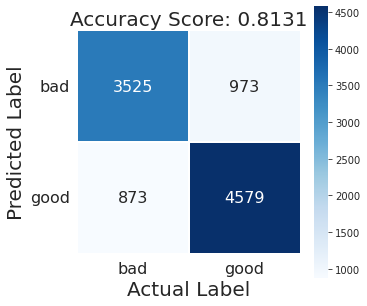

In [ ]:
#print('accuracy %s' % accuracy_score(predictions, y_test))
bc=classification_report(y_test, predictions,target_names=['1','-1'])
abc=confusion_matrix(y_test, predictions)
#print(bc)
#print(abc)
generate_report(abc, multiclass_roc_auc_score(y_test, predictions), bc)

Variation of Train data

In [ ]:
acc_ran_train=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, train_size=(i+1)/10, random_state = 42)

    ran = RandomForestClassifier(n_estimators=400,criterion='entropy')
    ran.fit(X_train,y_train)
    y_pred = ran.predict(X_test)
    acc_ran_train.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_ran_train)

accuracy 0.8166834170854271
accuracy 0.8336725463591135
accuracy 0.8442951285695827
accuracy 0.8448665762098598
accuracy 0.8491316931982634
accuracy 0.8509724106739032
accuracy 0.8531805848658426
accuracy 0.8561736770691994
accuracy 0.8670886075949367
[0.8166834170854271, 0.8336725463591135, 0.8442951285695827, 0.8448665762098598, 0.8491316931982634, 0.8509724106739032, 0.8531805848658426, 0.8561736770691994, 0.8670886075949367]


Variation of Test data

In [ ]:
acc_ran_test=[]
for i in range(9):
    X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=(i+1)/10, random_state = 42)

    ran = RandomForestClassifier(n_estimators=400,criterion='entropy')
    ran.fit(X_train,y_train)
    y_pred = ran.predict(X_test)
    acc_ran_test.append(accuracy_score(y_pred, y_test))
    print('accuracy %s' % accuracy_score(y_pred, y_test))
print (acc_ran_test)

accuracy 0.864376130198915
accuracy 0.8557213930348259
accuracy 0.8546879710581851
accuracy 0.8493894165535957
accuracy 0.8509406657018813
accuracy 0.8432082014171567
accuracy 0.842356893655511
accuracy 0.8340117593848937
accuracy 0.82321608040201
[0.864376130198915, 0.8557213930348259, 0.8546879710581851, 0.8493894165535957, 0.8509406657018813, 0.8432082014171567, 0.842356893655511, 0.8340117593848937, 0.82321608040201]


In [ ]:
l=model.predict([[1,1,1,1,-1,1,1,-1,1,-1,1,-1,-1,-1,-1]])
l

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [ ]:
l[0]

1

## Pickling the model for use in Web Application

In [ ]:
filename = 'phish_trainedv9mud0.001.sav'
pickle.dump(model, open(filename, 'wb'))
print("Model has been Dumped in sav format File")

Model has been Dumped in sav format File


## Feature Extraction Phase

In [ ]:
import whois
import datetime
text=input()
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
else:
    thirdval=1    
k=text.count("//")          
if k>1:
    fourthval=-1
else:
    fourthval=1  
if "-" in text:
    fifthval=-1
else:
    fifthval=1         
if "https" in text:
    sixthval=1
else:
    sixthval=-1
#subdomain ignored    

temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
else:
    tenthval=1    

import whois
from datetime import datetime

url=text

try:
    res=whois.whois(url)
    print (res)
    #print (len(res['creation_date']))
    try:
        a=res['creation_date'][0]
        b=datetime.now()
        c=b-a
        d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days
    #print (d)
    if d>365:
        eleventhval=1
    else:
        eleventhval=-1
except:
    aburl=1
    eleventhval=-1   

if aburl==1:
    twelthval=-1
else:
    twelthval=1    
    
import urllib.request, sys, re
import xmltodict, json

try:
    xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(text)).read()

    result= xmltodict.parse(xml)

    data = json.dumps(result).replace("@","")
    data_tojson = json.loads(data)
    url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
    rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])
    print (rank)
    if rank<=100000:
        thirt=1
    else:
        thirt=-1
    print (thirt)    
except:
    thirt=-1
    print (thirt)
    
print("site {site}, rank {rank}".format(site=url,rank=rank))    


print (oneval) #having ip   
print (secval) #length
print (thirdval) #atvalue
print (fourthval) #double slash
print (fifthval) #prefix suffix
#print (sixthval) #ssl
print (seventhval) #https token
print (eighthval) #sfh
print (ninthval) #submit to mail
print (tenthval) #redirect
print (eleventhval) #age of domain
print (twelthval) #abnormal url
print (thirt)

https://twitter.com
{
  "domain_name": [
    "TWITTER.COM",
    "twitter.com"
  ],
  "registrar": "CSC CORPORATE DOMAINS, INC.",
  "whois_server": "whois.corporatedomains.com",
  "referral_url": null,
  "updated_date": [
    "2022-01-17 06:08:20",
    "2022-01-17 01:08:20"
  ],
  "creation_date": [
    "2000-01-21 16:28:17",
    "2000-01-21 11:28:17"
  ],
  "expiration_date": "2023-01-21 16:28:17",
  "name_servers": [
    "A.R06.TWTRDNS.NET",
    "B.R06.TWTRDNS.NET",
    "C.R06.TWTRDNS.NET",
    "D.R06.TWTRDNS.NET",
    "D01-01.NS.TWTRDNS.NET",
    "D01-02.NS.TWTRDNS.NET",
    "NS3.P34.DYNECT.NET",
    "NS4.P34.DYNECT.NET",
    "c.r06.twtrdns.net",
    "d01-01.ns.twtrdns.net",
    "d.r06.twtrdns.net",
    "d01-02.ns.twtrdns.net",
    "b.r06.twtrdns.net",
    "a.r06.twtrdns.net"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "serverDeleteProhibited https://icann.org/epp#serverDeleteProhibited",
    "serverTransferProhibited https://

In [ ]:
import whois
import datetime
text=input()
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
else:
    thirdval=1    
k=text.count("//")          
if k>1:
    fourthval=-1
else:
    fourthval=1  
if "-" in text:
    fifthval=-1
else:
    fifthval=1         
if "https" in text:
    sixthval=1
else:
    sixthval=-1
#subdomain ignored    

temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
else:
    tenthval=1    

import whois
from datetime import datetime

url=text

try:
    res=whois.whois(url)
    print (res)
    #print (len(res['creation_date']))
    try:
        a=res['creation_date'][0]
        b=datetime.now()
        c=b-a
        d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days
    #print (d)
    if d>365:
        eleventhval=1
    else:
        eleventhval=-1
except:
    aburl=1
    eleventhval=-1   

if aburl==1:
    twelthval=-1
else:
    twelthval=1    
    
import urllib.request, sys, re
import xmltodict, json

try:
    xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(text)).read()

    result= xmltodict.parse(xml)

    data = json.dumps(result).replace("@","")
    data_tojson = json.loads(data)
    url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
    rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])
    print (rank)
    if rank<=100000:
        thirt=1
    else:
        thirt=-1
    print (thirt)    
except:
    thirt=-1
    print (thirt)
    
print("site {site}, rank {rank}".format(site=url,rank=rank))    


print (oneval) #having ip   
print (secval) #length
print (thirdval) #atvalue
print (fourthval) #double slash
print (fifthval) #prefix suffix
#print (sixthval) #ssl
print (seventhval) #https token
print (eighthval) #sfh
print (ninthval) #submit to mail
print (tenthval) #redirect
print (eleventhval) #age of domain
print (twelthval) #abnormal url
print (thirt)

https://promo-twitter.info
{
  "domain_name": "PROMO-TWITTER.INFO",
  "registrar": "Registrar of domain names REG.RU LLC",
  "whois_server": "whois.reg.com",
  "referral_url": null,
  "updated_date": "2020-05-12 20:38:55",
  "creation_date": "2020-05-07 19:02:48",
  "expiration_date": "2021-05-07 19:02:48",
  "name_servers": [
    "NS1.HOSTING.REG.RU",
    "NS2.HOSTING.REG.RU",
    "ns1.hosting.reg.ru",
    "ns2.hosting.reg.ru"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "serverHold https://icann.org/epp#serverHold",
    "serverTransferProhibited https://icann.org/epp#serverTransferProhibited",
    "clientTransferProhibited http://www.icann.org/epp#clientTransferProhibited",
    "serverHold http://www.icann.org/epp#serverHold",
    "serverTransferProhibited http://www.icann.org/epp#serverTransferProhibited"
  ],
  "emails": [
    "abuse@reg.ru",
    "PROMO-TWITTER.INFO@regprivate.ru"
  ],
  "name": "Protection of Private Person"

In [ ]:
model.predict([[-1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1]])
model.predict([[1, -1, 1, 1,  1, -1,  1, 1, 1, -1,  1, 1,  1, 1, -1]])
model.predict([[1, -1, 1, 1, -1, -1,  1, 1, 1, -1,  1, 1,  1, 1, -1]])

array([-1], dtype=int64)

In [ ]:
import whois
import datetime
text=input()
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
else:
    thirdval=1    
k=text.count("//")          
if k>1:
    fourthval=-1
else:
    fourthval=1  
if "-" in text:
    fifthval=-1
else:
    fifthval=1         
if "https" in text:
    sixthval=1
else:
    sixthval=-1
#subdomain ignored    

temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
else:
    tenthval=1    

import whois
from datetime import datetime

url=text

try:
    res=whois.whois(url)
    print (res)
    #print (len(res['creation_date']))
    try:
        a=res['creation_date'][0]
        b=datetime.now()
        c=b-a
        d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days
    #print (d)
    if d>365:
        eleventhval=1
    else:
        eleventhval=-1
except:
    aburl=1
    eleventhval=-1   

if aburl==1:
    twelthval=-1
else:
    twelthval=1    


print (oneval) #having ip   
print (secval) #length
print (thirdval) #atvalue
print (fourthval) #double slash
print (fifthval) #prefix suffix
print (sixthval) #ssl
print (seventhval) #https token
print (eighthval) #sfh
print (ninthval) #submit to mail
print (tenthval) #redirect
print (eleventhval) #age of domain
print (twelthval) #abnormal url

https://promo-twitter.info
{
  "domain_name": "PROMO-TWITTER.INFO",
  "registrar": "Registrar of domain names REG.RU LLC",
  "whois_server": "whois.reg.com",
  "referral_url": null,
  "updated_date": "2020-05-12 20:38:55",
  "creation_date": "2020-05-07 19:02:48",
  "expiration_date": "2021-05-07 19:02:48",
  "name_servers": [
    "NS1.HOSTING.REG.RU",
    "NS2.HOSTING.REG.RU",
    "ns1.hosting.reg.ru",
    "ns2.hosting.reg.ru"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "serverHold https://icann.org/epp#serverHold",
    "serverTransferProhibited https://icann.org/epp#serverTransferProhibited",
    "clientTransferProhibited http://www.icann.org/epp#clientTransferProhibited",
    "serverHold http://www.icann.org/epp#serverHold",
    "serverTransferProhibited http://www.icann.org/epp#serverTransferProhibited"
  ],
  "emails": [
    "abuse@reg.ru",
    "PROMO-TWITTER.INFO@regprivate.ru"
  ],
  "name": "Protection of Private Person"

## Pickled model is used in below step :




## Module to predict whether a URL is Legitimate or Malicious (Phishing)

In [ ]:
pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json


In [ ]:
text=input()
#nm=request.GET['url']
import tldextract
do=tldextract.extract(text).domain
sdo=tldextract.extract(text).subdomain
suf=tldextract.extract(text).suffix
aburl=-1
digits="0123456789"
if text[8] in digits:
    oneval=-1
else:
    oneval=1    
if len(text)>170:
    secval=-1
else:
    secval=1  
if "@" in text:
    thirdval=-1
    var3="'@' detected"
else:
    thirdval=1       
    var3="No '@' detected"
k=text.count("//")          
if k>1:
    fourthval=-1
    var4="More Redirects"
else:
    fourthval=1

if "-" in do or "-" in sdo:
    fifthval=-1
    var5="Prefix-Suffix detected"
else:
    fifthval=1 
    var5="No Prefix-Suffix detected"     

if "https" in text:
    sixthval=1
else:
    sixthval=-1
temp=text
temp=temp[6:]
k1=temp.count("https")

if k1 >=1:
    seventhval=-1
else:
    seventhval=1
if "about:blank" in text:
    eighthval=-1
else:
    eighthval=1
if "mail()" or "mailto:" in text:
    ninthval=-1
else:
    ninthval=1
re=text.count("//")          
if re>3:
    tenthval=-1
    var10="redirects more than 2"
else:
    tenthval=1    
    var10=f"{re-1} redirects detected"

import whois
from datetime import datetime

url=text
#code replaced whois
# 
"""try:"""
d=-1
try:
    res=whois.whois(url)
    cpyres=res
except:
    print("getaddrerrror DNE")
    d=0
    name="Not found in WHOIS database"
    org="Not found in WHOIS database"
    add="Not found in WHOIS database"
    city="Not found in WHOIS database"
    state="Not found in WHOIS database"
    ziip="Not found in WHOIS database"
    country="Not found in WHOIS database"
    emails="Not found in WHOIS database"
    dom="Not Found in WHOIS database"
    registrar="Not Found in WHOIS database"
if d!=0:    
    try:
        if len(res.creation_date)>1:
            a=res['creation_date'][0]
            b=datetime.now()
            c=b-a
            d=c.days
    except:
        a=res['creation_date']
        b=datetime.now()
        c=b-a
        d=c.days





if d>365:
    eleventhval=1
    aburl=1
    var11=f"Domain age is {d} days"
elif d<=365:
    eleventhval=-1
    aburl=-1
    var11=f"Domain age working less than a year, {d} days"





if aburl==-1:
    twelthval=-1
    varab="Abnormal URL detected"
else:
    twelthval=1 
    varab="Website Registered on WHOIS Database"

#print (twelthval,eleventhval,aburl,d)    
import urllib.request, sys, re
import xmltodict, json

try:
    xml = urllib.request.urlopen('http://data.alexa.com/data?cli=10&dat=s&url={}'.format(text)).read()

    result= xmltodict.parse(xml)

    data = json.dumps(result).replace("@","")
    data_tojson = json.loads(data)
    url = data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["URL"]
    rank= int(data_tojson["ALEXA"]["SD"][1]["POPULARITY"]["TEXT"])
    #print ("rank",rank)
    if rank<=150000:
        thirt=1
    else:
        thirt=-1
        var13=f"Ranked {rank} in Alexa Database, Larger index in alexa database detected!!"
    #print (thirt)    
except:
    thirt=-1 
    rank=-1
    ##############var13="Larger index in alexa database"
    var13="Not indexed in alexa database"
    #print (rank)                  



filename = 'phish_trainedv7mud0.001.sav'

loaded_model = joblib.load(filename)

arg=loaded_model.predict(([[oneval,secval,thirdval,fourthval,fifthval,seventhval,eighthval,ninthval,tenthval,eleventhval,twelthval,thirt]]))
arg

https://facebook.com


ModuleNotFoundError: ignored